In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
df=pd.read_csv("customer_behavior (1).csv")
df

,Customer_Region,Age_Group,Prefers_Online_Shopping,Has_Loyalty_Card,Buys_On_Discount,Visits_Store_Frequency,Customer_Satisfaction,Preferred_Payment_Method,Recommends_To_Friends,Responds_To_Offers,Active_Customer
0,North,18-25,No,Yes,Yes,Rarely,Very Satisfied,Debit Card,No,No,No
1,Central,46-60,No,Yes,Yes,Sometimes,Satisfied,Credit Card,Yes,Yes,No
2,South,26-35,Yes,Yes,No,Sometimes,Dissatisfied,Wallet,Yes,No,Yes
3,North,36-45,No,Yes,No,Sometimes,Satisfied,Cash,Yes,Yes,No
4,East,60+,No,Yes,No,Never,Very Satisfied,Debit Card,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
995,East,18-25,No,Yes,No,Rarely,Satisfied,UPI,Yes,No,Yes
996,North,60+,Yes,Yes,Yes,Never,Very Satisfied,UPI,Yes,Yes,Yes
997,Central,36-45,No,Yes,No,Never,Very Satisfied,Debit Card,No,Yes,Yes
998,West,36-45,Yes,No,Yes,Never,Dissatisfied,Wallet,Yes,No,No


In [46]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Customer_Region,Age_Group,Prefers_Online_Shopping,Has_Loyalty_Card,Buys_On_Discount,Visits_Store_Frequency,Customer_Satisfaction,Preferred_Payment_Method,Recommends_To_Friends,Responds_To_Offers,Active_Customer
0,2,0,0,1,1,2,3,2,0,0,0
1,0,3,0,1,1,3,2,1,1,1,0
2,3,1,1,1,0,3,0,4,1,0,1
3,2,2,0,1,0,3,2,0,1,1,0
4,1,4,0,1,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,2,2,3,1,0,1
996,2,4,1,1,1,0,3,3,1,1,1
997,0,2,0,1,0,0,3,2,0,1,1
998,4,2,1,0,1,0,0,4,1,0,0


In [47]:
x=df.drop("Active_Customer",axis=1)
y=df["Active_Customer"]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
model=BernoulliNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [50]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [51]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.515

In [52]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[72, 24],
       [73, 31]])

In [53]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.00417852, 0.0040195 , 0.00128222, 0.        , 0.00425601]),
 'score_time': array([0.00199294, 0.00375986, 0.        , 0.        , 0.00201201]),
 'test_score': array([0.5  , 0.45 , 0.52 , 0.495, 0.475]),
 'train_score': array([0.53125, 0.5525 , 0.52   , 0.53125, 0.53125])}

In [54]:
cla=classification_report(y_test,y_pred)
cla

'              precision    recall  f1-score   support\n\n           0       0.50      0.75      0.60        96\n           1       0.56      0.30      0.39       104\n\n    accuracy                           0.52       200\n   macro avg       0.53      0.52      0.49       200\nweighted avg       0.53      0.52      0.49       200\n'

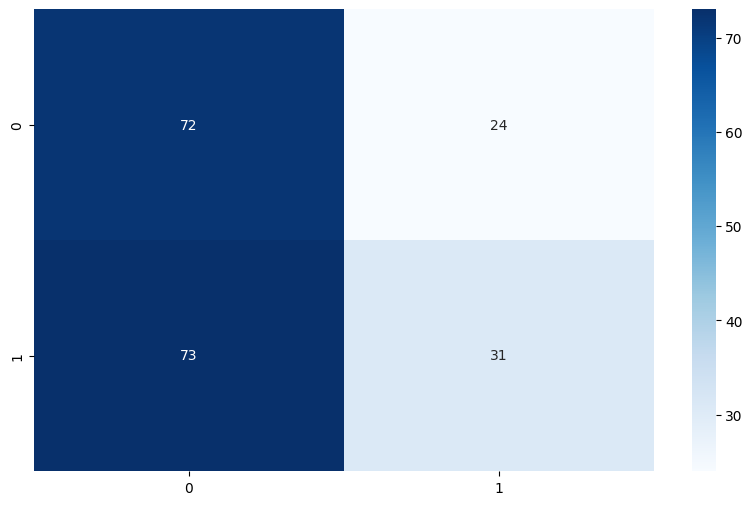

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()